In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("diabetes_data_upload.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
df.isna().sum() 

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
df['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

In [8]:
# Encode gender and binary symptoms as per paper
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
binary_cols = df.columns.drop(['Gender', 'Age', 'class'])
for col in binary_cols:
    df[col] = df[col].map({'Yes': 0, 'No': 1})
df['class'] = df['class'].map({'Positive': 0, 'Negative': 1})
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
1,58,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,0
2,41,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0
3,45,0,1,1,0,0,0,0,1,0,1,0,1,1,1,1,0
4,60,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
#ANN using k-fold

Average ANN Accuracy (5-Fold): 93.26923076923079 %
F1 score for each class: [0.9375 0.9   ]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        64
           1       0.90      0.90      0.90        40

    accuracy                           0.92       104
   macro avg       0.92      0.92      0.92       104
weighted avg       0.92      0.92      0.92       104



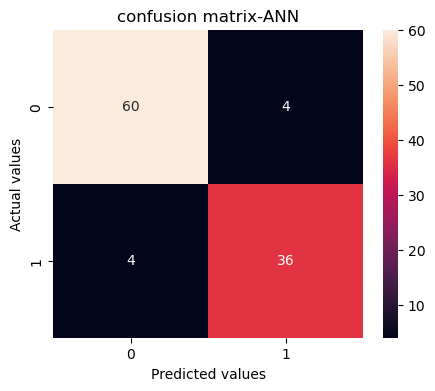

In [11]:
from sklearn.preprocessing import StandardScaler
ann_model = MLPClassifier(hidden_layer_sizes=(64), activation='logistic', max_iter=2000, random_state=42)

# 5-Fold Stratified Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ann_accs = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ann_model.fit(X_train_scaled, y_train)
    y_pred = ann_model.predict(X_test_scaled)
    ann_accs.append(accuracy_score(y_test, y_pred))

print("Average ANN Accuracy (5-Fold):", np.mean(ann_accs)*100,"%")
print('F1 score for each class:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test,y_pred))
plt.figure(figsize=(5,4))
plt.title("confusion matrix-ANN")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

SVM Accuracy Score:  93.58974358974359 %
F1 score for each class: [0.94736842 0.91803279]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        96
           1       0.90      0.93      0.92        60

    accuracy                           0.94       156
   macro avg       0.93      0.94      0.93       156
weighted avg       0.94      0.94      0.94       156



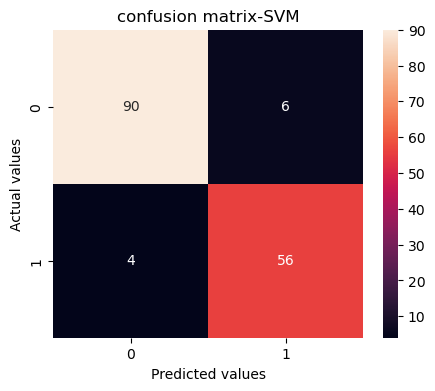

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(x_train, y_train)
svm_preds = svm_model.predict(x_test)

print("SVM Accuracy Score: ",accuracy_score(y_test,svm_preds)*100,"%")
print('F1 score for each class:', f1_score(y_test, svm_preds, average=None))
print(classification_report(y_test,svm_preds))
plt.figure(figsize=(5,4))
plt.title("confusion matrix-SVM")
sns.heatmap(confusion_matrix(y_test,svm_preds),annot=True,fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

XGBoost Accuracy Score:  96.15384615384616 %
F1 score for each class (XGBoost): [0.96842105 0.95081967]
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        96
           1       0.94      0.97      0.95        60

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



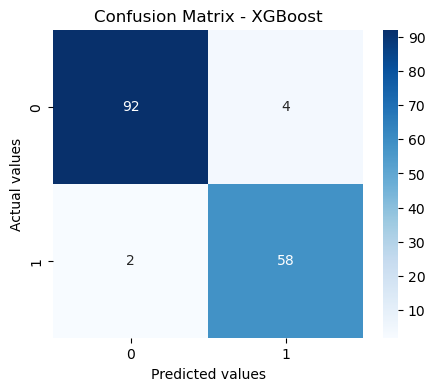

In [58]:
xgb_model = XGBClassifier(n_estimators=50,max_depth=2,eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

# Prediction and evaluation
y_pred_xgb = xgb_model.predict(x_test)
print("XGBoost Accuracy Score: ", accuracy_score(y_test, y_pred_xgb) * 100, "%")
print('F1 score for each class (XGBoost):', f1_score(y_test, y_pred_xgb, average=None))
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(5, 4))
plt.title("Confusion Matrix - XGBoost")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

C:\Users\ruthw\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Accuracy Score (ANN):  95.51282051282051 %
F1 Score for each class: [0.96296296 0.94308943]
Classification Report (ANN):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        96
           1       0.92      0.97      0.94        60

    accuracy                           0.96       156
   macro avg       0.95      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156



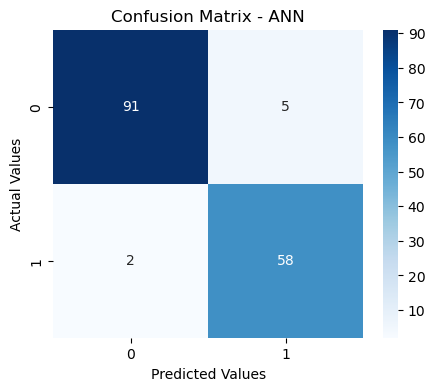

In [14]:
#balancing the data

from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
x_train_bal, y_train_bal = sm.fit_resample(x_train_scaled, y_train)

ann_model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=2000, random_state=42)
ann_model.fit(x_train_bal, y_train_bal)
ann_preds = ann_model.predict(x_test_scaled)

# Evaluate ANN predictions
print("Accuracy Score (ANN): ", accuracy_score(y_test, ann_preds) * 100, "%")
print("F1 Score for each class:", f1_score(y_test, ann_preds, average=None))
print("Classification Report (ANN):")
print(classification_report(y_test, ann_preds))

# Confusion matrix heatmap for ANN predictions
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix - ANN")
sns.heatmap(confusion_matrix(y_test, ann_preds), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Fuzzy Fused Accuracy (min-rule): 96.15384615384616 %
Classification Report for Fuzzy Logic Fusion:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        96
           1       0.94      0.97      0.95        60

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



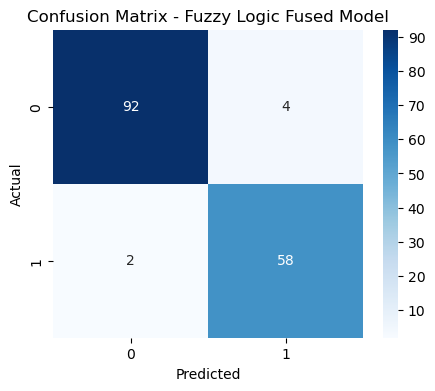

In [15]:
x_test_scaled = scaler.transform(x_test)

# Step 1: Get membership probabilities from both models
svm_probs = svm_model.predict_proba(x_test)  # shape: [n_samples, 2]
ann_probs = ann_model.predict_proba(x_test_scaled)  # shape: [n_samples, 2]

fuzzy_scores = np.where(svm_probs > 0.8, svm_probs, ann_probs)
final_probs = (svm_probs + ann_probs) / 2
fused_preds = np.argmax(final_probs, axis=1)

# Step 2: Apply fuzzy inference using min-rule
fuzzy_scores = np.minimum(svm_probs, ann_probs)  # shape: [n_samples, 2]

# Step 3: Defuzzify using centroid-like decision (argmax)
fused_preds = np.argmax(fuzzy_scores, axis=1)  # 0 = Positive (Diabetic), 1 = Negative

# Step 4: Evaluate performance
print("Fuzzy Fused Accuracy (min-rule):", accuracy_score(y_test, fused_preds) * 100, "%")
print("Classification Report for Fuzzy Logic Fusion:")
print(classification_report(y_test, fused_preds))

# Confusion matrix
plt.figure(figsize=(5, 4))
plt.title("Confusion Matrix - Fuzzy Logic Fused Model")
sns.heatmap(confusion_matrix(y_test, fused_preds), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
import numpy as np

# Input values
def predict_diabetes_status(
    age, gender, polyuria, polydipsia, sudden_weight_loss, weakness,
    polyphagia, genital_thrush, visual_blurring, itching, irritability,
    delayed_healing, partial_paresis, muscle_stiffness, alopecia, obesity
):
    # Encode inputs based on paper
    gender = 0 if gender.lower() == "male" else 1
    binary_map = {"yes": 0, "no": 1}
    
    inputs = [
        int(age),
        gender,
        binary_map[polyuria.lower()],
        binary_map[polydipsia.lower()],
        binary_map[sudden_weight_loss.lower()],
        binary_map[weakness.lower()],
        binary_map[polyphagia.lower()],
        binary_map[genital_thrush.lower()],
        binary_map[visual_blurring.lower()],
        binary_map[itching.lower()],
        binary_map[irritability.lower()],
        binary_map[delayed_healing.lower()],
        binary_map[partial_paresis.lower()],
        binary_map[muscle_stiffness.lower()],
        binary_map[alopecia.lower()],
        binary_map[obesity.lower()]
    ]
    
    # Convert to array for model
    X_input = np.array([inputs])
    
    # Apply scaling
    X_scaled_ann = scaler.transform(X_input)
    
    # Get probabilities from both models
    svm_probs = svm_model.predict_proba(X_input)        # [1, 2]
    ann_probs = ann_model.predict_proba(X_scaled_ann)   # [1, 2]

    # Fuzzy inference using min-rule
    fuzzy_scores = np.minimum(svm_probs, ann_probs)     # shape: [1, 2]

    # Final prediction
    fused_pred = np.argmax(fuzzy_scores, axis=1)[0]     # 0 = Positive, 1 = Negative

    return "Positive (Diabetic)" if fused_pred == 0 else "Negative (Non-Diabetic)"


In [18]:
predict_diabetes_status(
    age=45,
    gender="Male",
    polyuria="Yes",
    polydipsia="Yes",
    sudden_weight_loss="No",
    weakness="Yes",
    polyphagia="No",
    genital_thrush="No",
    visual_blurring="Yes",
    itching="No",
    irritability="Yes",
    delayed_healing="No",
    partial_paresis="No",
    muscle_stiffness="No",
    alopecia="No",
    obesity="No"
)


C:\Users\ruthw\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ruthw\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'Positive (Diabetic)'

In [19]:
import gradio as gr
import numpy as np

# === Pretrained Models and Scaler (Replace with actual loaded ones) ===
# from joblib import load
# svm_model = load("svm_model.joblib")
# ann_model = load("ann_model.joblib")
# scaler = load("scaler.joblib")

def predict_diabetes_status_gradio(
    age, gender, polyuria, polydipsia, sudden_weight_loss, weakness,
    polyphagia, genital_thrush, visual_blurring, itching, irritability,
    delayed_healing, partial_paresis, muscle_stiffness, alopecia, obesity
):
    gender_val = 0 if gender == "Male" else 1
    binary_map = {"Yes": 0, "No": 1}

    features = [
        age,
        gender_val,
        binary_map[polyuria],
        binary_map[polydipsia],
        binary_map[sudden_weight_loss],
        binary_map[weakness],
        binary_map[polyphagia],
        binary_map[genital_thrush],
        binary_map[visual_blurring],
        binary_map[itching],
        binary_map[irritability],
        binary_map[delayed_healing],
        binary_map[partial_paresis],
        binary_map[muscle_stiffness],
        binary_map[alopecia],
        binary_map[obesity]
    ]

    X_input = np.array([features])
    X_scaled = scaler.transform(X_input)

    svm_probs = svm_model.predict_proba(X_input)
    ann_probs = ann_model.predict_proba(X_scaled)

    fuzzy_scores = np.minimum(svm_probs, ann_probs)
    prediction = np.argmax(fuzzy_scores)

    result_text = "✅ Positive (Diabetic)" if prediction == 0 else "✅ Negative (Non-Diabetic)"

    report = f"""
### 📝 Diabetes Risk Assessment Report

**Age:** {age}  
**Gender:** {gender}  

**Symptoms:**
- Polyuria: {polyuria}
- Polydipsia: {polydipsia}
- Sudden Weight Loss: {sudden_weight_loss}
- Weakness: {weakness}
- Polyphagia: {polyphagia}
- Genital Thrush: {genital_thrush}
- Visual Blurring: {visual_blurring}
- Itching: {itching}
- Irritability: {irritability}
- Delayed Healing: {delayed_healing}
- Partial Paresis: {partial_paresis}
- Muscle Stiffness: {muscle_stiffness}
- Alopecia: {alopecia}
- Obesity: {obesity}

**Prediction:** {result_text}

---

🧠 *Note: This is an AI-powered pre-screening tool. The result is based on your symptoms and should not be taken as a medical diagnosis. Please consult a healthcare provider for confirmation.*
"""
    return report


# === Gradio Interface ===
with gr.Blocks() as demo:
    gr.Markdown("## 🩺 Diabetes Prediction using Fuzzy Logic (SVM + ANN)")
    gr.Markdown("""
This tool helps assess your risk of diabetes based on your age, gender, and common symptoms.

Please answer the following questions honestly.  
You'll receive a risk report at the end.  
*This tool is only for educational and awareness purposes.*
    """)

    yes_no = ["Yes", "No"]

    with gr.Group():
        with gr.Row():
            age = gr.Number(label="Age", value=30)
            gender = gr.Dropdown(["Male", "Female"], label="Gender", value="Male")

    with gr.Group():
        gr.Markdown("### 🔍 Symptoms Checklist")
        with gr.Row():
            polyuria = gr.Dropdown(yes_no, label="Polyuria", value="No", info="Frequent urination")
            polydipsia = gr.Dropdown(yes_no, label="Polydipsia", value="No", info="Excessive thirst")
            sudden_weight_loss = gr.Dropdown(yes_no, label="Sudden Weight Loss", value="No", info="Unexpected weight loss")
            weakness = gr.Dropdown(yes_no, label="Weakness", value="No", info="Fatigue or low energy")

        with gr.Row():
            polyphagia = gr.Dropdown(yes_no, label="Polyphagia", value="No", info="Excessive hunger")
            genital_thrush = gr.Dropdown(yes_no, label="Genital Thrush", value="No", info="Fungal infection in genital area")
            visual_blurring = gr.Dropdown(yes_no, label="Visual Blurring", value="No", info="Blurry vision")
            itching = gr.Dropdown(yes_no, label="Itching", value="No", info="Persistent skin itching")

        with gr.Row():
            irritability = gr.Dropdown(yes_no, label="Irritability", value="No", info="Mood swings or short temper")
            delayed_healing = gr.Dropdown(yes_no, label="Delayed Healing", value="No", info="Wounds take longer to heal")
            partial_paresis = gr.Dropdown(yes_no, label="Partial Paresis", value="No", info="Weakness or partial paralysis")
            muscle_stiffness = gr.Dropdown(yes_no, label="Muscle Stiffness", value="No", info="Tight muscles or reduced movement")

        with gr.Row():
            alopecia = gr.Dropdown(yes_no, label="Alopecia", value="No", info="Hair loss")
            obesity = gr.Dropdown(yes_no, label="Obesity", value="No", info="Excess body weight")

    with gr.Row():
        predict_button = gr.Button("🔎 Predict")
        clear_button = gr.Button("🧹 Clear All")

    output = gr.Markdown(label="Prediction Report")

    predict_button.click(
        fn=predict_diabetes_status_gradio,
        inputs=[
            age, gender, polyuria, polydipsia, sudden_weight_loss, weakness,
            polyphagia, genital_thrush, visual_blurring, itching, irritability,
            delayed_healing, partial_paresis, muscle_stiffness, alopecia, obesity
        ],
        outputs=output
    )

    clear_button.click(
        fn=lambda: (
            0, "Male", "No", "No", "No", "No", "No", "No", "No", "No",
            "No", "No", "No", "No", "No", "No", ""
        ),
        inputs=[],
        outputs=[
            age, gender, polyuria, polydipsia, sudden_weight_loss, weakness,
            polyphagia, genital_thrush, visual_blurring, itching, irritability,
            delayed_healing, partial_paresis, muscle_stiffness, alopecia, obesity,
            output
        ]
    )

demo.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
